In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Many thanks to this awesome tutorial: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

## Generate sample data

(150, 2)


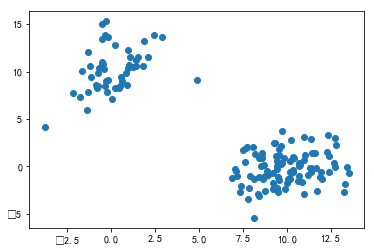

In [3]:
np.random.seed(42)
a = np.random.multivariate_normal([10,0], [[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0, 10], [[2,1],[1,4]], size = [50,])
X = np.concatenate((a,b), )
print(X.shape)
plt.scatter(X[:,0], X[:,1])

In [4]:
#generate linkage matrix
Z = linkage(X, 'centroid')
print(Z.shape)

(149, 4)


In [5]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.9588434598315442

In [6]:
#Z[i] tells us which clusters were merged in i-1th iteration
# idx1, idx2, distance, sample count
Z[0]

array([66.     , 91.     ,  0.02299,  2.     ])

In [7]:
Z[1]

array([17.     , 69.     ,  0.02481,  2.     ])

In [8]:
Z[:20]

array([[ 66.     ,  91.     ,   0.02299,   2.     ],
       [ 17.     ,  69.     ,   0.02481,   2.     ],
       [ 72.     ,  87.     ,   0.07878,   2.     ],
       [  6.     ,  18.     ,   0.10092,   2.     ],
       [ 40.     ,  57.     ,   0.10392,   2.     ],
       [  0.     ,  93.     ,   0.11289,   2.     ],
       [109.     , 134.     ,   0.11337,   2.     ],
       [ 28.     ,  68.     ,   0.12189,   2.     ],
       [  4.     ,  44.     ,   0.13721,   2.     ],
       [ 52.     , 154.     ,   0.15013,   3.     ],
       [119.     , 146.     ,   0.1522 ,   2.     ],
       [108.     , 120.     ,   0.15921,   2.     ],
       [ 48.     ,  75.     ,   0.16427,   2.     ],
       [ 43.     ,  82.     ,   0.16567,   2.     ],
       [121.     , 129.     ,   0.17229,   2.     ],
       [138.     , 144.     ,   0.17445,   2.     ],
       [ 16.     ,  58.     ,   0.17723,   2.     ],
       [ 34.     ,  77.     ,   0.18201,   2.     ],
       [ 99.     , 166.     ,   0.18276,   3. 

In [9]:
#we see that there is an index of 154, which means it's the 5th cluster formed by 40 and 57
X[[40, 57,52]]

array([[10.22066, -0.69132],
       [10.17857, -0.59631],
       [10.34825, -0.62268]])

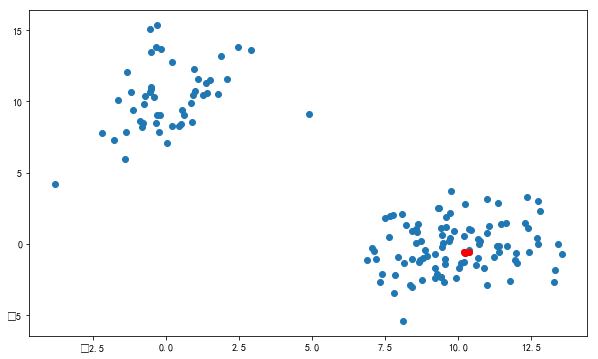

In [15]:
idxs = [40,52,57]
plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[idxs, 0],X[idxs,1], color = 'r')

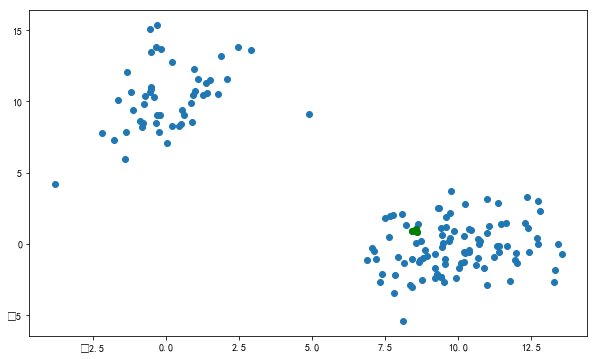

In [14]:
#idx = 166 corrspond to 16 and 58, check out their distance to 99
idxs = [16,58,99]
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idxs, 0],X[idxs, 1], color = 'g')

## Plot dendrogram

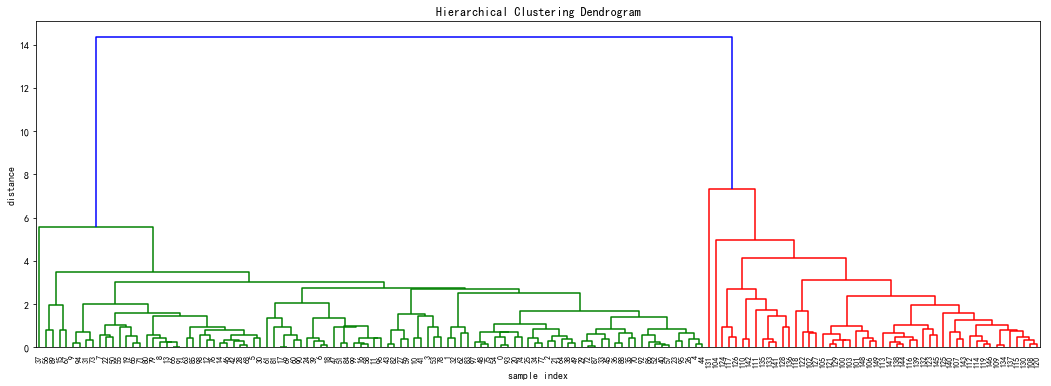

In [17]:
plt.figure(figsize = (18,6))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("sample index")
plt.ylabel("distance")
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.show()

1. horizontal lines are cluster merges
2. vertical line tells you which clusters/labels were part of merge
3. heights of horizontal line tells the distance between two clusters

In [18]:
Z[-4:,2]

array([ 4.97156,  5.57279,  7.34446, 14.36102])